<a href="https://colab.research.google.com/github/PedroMatumoto/data-visualization-notebooks/blob/main/IMT_EX_Distribuicao_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **CASE: Vendas Diárias**

Ao longo do ano as vendas diárias de uma loja de alimentos estão concentradas em torno de R\$ 5.100 (mediana). É sabido que o volume de vendas de alimentos tem uma distribuição `lognorm` $^1$. O valor do desvio padrão da distribuição lognormal é 0.5 $^2$.

<br>
</small>
$^1$ Isso não é de fato verdadeiro, mas será considerado válido para os propósitos do exercício.

<br>
</small>
$^2$ Tecnicamente, representa o desvio padrão da variável aleatória normalmente distribuída que é exponenciada para obter a variável log-normal.


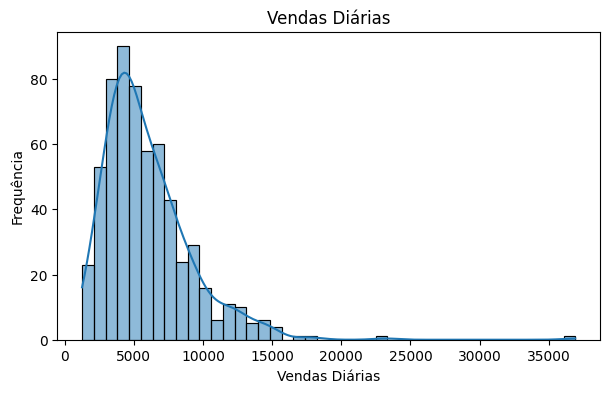

In [3]:
from scipy.stats import lognorm

plt.figure(figsize=(7,4))
np.random.seed(1)
x = lognorm.rvs(s=0.5, scale=5100, size=600)
sns.histplot(x, kde=True)
plt.title('Vendas Diárias')
plt.xlabel('Vendas Diárias')
plt.ylabel('Frequência')
plt.show()


In [4]:
np.mean(x), np.std(x), np.median(x)

(np.float64(5969.583348745133),
 np.float64(3243.75521699896),
 np.float64(5225.679644797738))

In [5]:
shape, loc, scale = lognorm.fit(x, floc=0)  # floc=0 força o deslocamento (loc) a ser 0
shape, loc, scale


(np.float64(0.4990060646787285), 0, np.float64(5269.691042089724))

# Q1A.

Qual a probabilidade das vendas ficarem abaixo de R$ 3.000 em um determinado dia.




In [12]:
lognorm.cdf(3000, s=0.5, scale=5100)

np.float64(0.14428667391627004)

# Q1B.

Qual a probabilidade de termos um dia de faturamento acima de R$ 8.000?




In [13]:
1 - lognorm.cdf(8000, s=0.5, scale=5100)

np.float64(0.18395317738992456)

# Q1C.

Qual o valor mínimo que você pode esperar vender em 95% dos dias? (renda mínima garantida)




In [28]:
lognorm.ppf(0.05, s=0.5, scale=5100)

np.float64(2240.7569351302113)

# Q1D.

Com base nos dados de vendas, produza um gráfico de distribuição o mais próximo da figura abaixo. (`figsize=(6,3.5)`).

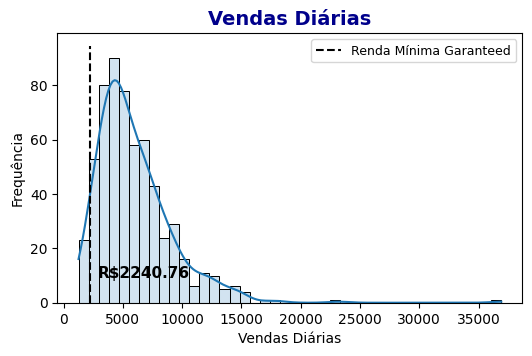

In [62]:
fig, ax = plt.subplots(figsize=(6, 3.5))

h = sns.histplot(x, kde=True, ax=ax, alpha=0.2)

_,ylim = ax.get_ylim()
x_min, x_max = ax.get_xlim()
# Customize the plot
ax.set_xlabel("Vendas Diárias")
ax.set_ylabel("Frequência")
ax.set_title("Vendas Diárias",fontsize=14,weight='bold', color='darkblue')
ax.vlines(lognorm.ppf(0.05, s=0.5, scale=5100),0,ylim,color=(0.0, 0.0, 0.0),linestyles='--', label = 'Renda Mínima Garanteed')
pos = x_min
for i in range(4):
  pos += h.patches[i].get_width()
ax.text(pos,9,'R$' + str(np.round(lognorm.ppf(0.05, s=0.5, scale=5100),2)),fontsize=11,color='black', weight='bold')

ax.legend(fontsize=9)
plt.show()

# Q1E.

Com base nos dados de vendas, produza um gráfico de distribuição o mais próximo da figura abaixo. (`figsize=(12,3.5)`).

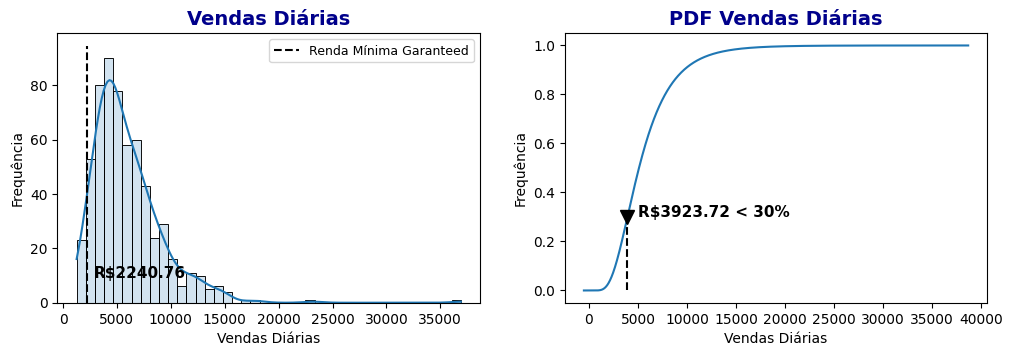

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.5))
h = sns.histplot(x, kde=True, ax=ax1, alpha=0.2)

_,ylim = ax1.get_ylim()
x_min, x_max = ax1.get_xlim()
# Customize the plot
ax1.set_xlabel("Vendas Diárias")
ax1.set_ylabel("Frequência")
ax1.set_title("Vendas Diárias",fontsize=14,weight='bold', color='darkblue')
ax1.vlines(lognorm.ppf(0.05, s=0.5, scale=5100),0,ylim,color=(0.0, 0.0, 0.0),linestyles='--', label = 'Renda Mínima Garanteed')
pos = x_min
for i in range(4):
  pos += h.patches[i].get_width()
ax1.text(pos,9,'R$' + str(np.round(lognorm.ppf(0.05, s=0.5, scale=5100),2)),fontsize=11,color='black', weight='bold')
ax1.legend(fontsize=9)

# no grafico 2, plotar o pdf
x_pdf = np.linspace(x_min, x_max, 1000)
y_pdf = lognorm.cdf(x_pdf, s=0.5, scale=5100)
ax2.plot(x_pdf, y_pdf)
ax2.set_xlabel("Vendas Diárias")
ax2.set_ylabel("Frequência")
ax2.set_title("PDF Vendas Diárias",fontsize=14,weight='bold', color='darkblue')
ax2.vlines(lognorm.ppf(0.30, s=0.5, scale=5100),0,0.3,color=(0.0, 0.0, 0.0),linestyles='--')
# colocar no gráfico uma anotacao com lognorm.ppf(0.65, s=0.5, scale=5100)
x_marker = lognorm.ppf(0.30, s=0.5, scale=5100)
plt.plot(x_marker, 0.3, marker='v', color='black', markersize=10)
ax2.text(5000,0.3,'R$'+str(np.round(lognorm.ppf(0.30, s=0.5, scale=5100),2)) + ' < 30%',fontsize=11,color='black', weight='bold')

plt.show()

# **CASE: Vendas Diárias 2**

Considere os valores de vendas de 5 anos de empresa empresa de alimentos abaixo.

In [24]:
#@markdown just run
np.random.seed(1)
years = 5
days_per_year = 365
total_days = years * days_per_year

# Bimodal distribution
sales_mode1 = np.random.normal(loc=2000, scale=500, size=int(total_days*0.4))
sales_mode2 = np.random.lognormal(mean=np.log(5000), sigma=0.3, size=int(total_days*0.6))

sales_data = np.concatenate((sales_mode1, sales_mode2))
np.random.shuffle(sales_data)

df = pd.DataFrame({'Sales': sales_data})
df.index = pd.date_range(start='2023-01-01', periods=total_days, freq='D')





In [25]:
df.head()

,Sales
2023-01-01,8137.447398
2023-01-02,1422.508683
2023-01-03,2431.672659
2023-01-04,5431.075252
2023-01-05,4503.687792


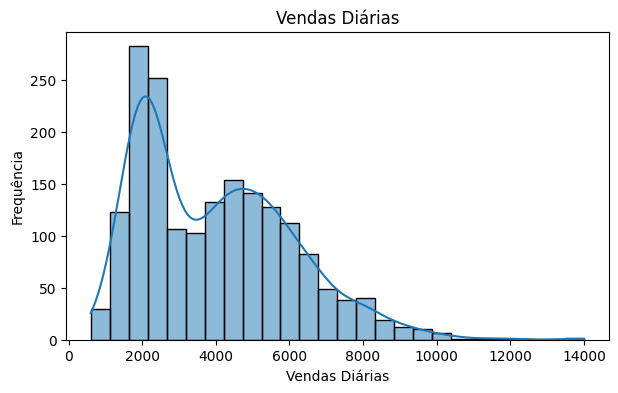

In [26]:
plt.figure(figsize=(7,4))
np.random.seed(1)

sns.histplot(df.Sales, kde=True)
plt.title('Vendas Diárias')
plt.xlabel('Vendas Diárias')
plt.ylabel('Frequência')
plt.show()

# Q2A.

Qual a probabilidade aproximada das vendas ficarem abaixo de R$ 3.000 em um determinado dia.




In [88]:
df.Sales.lt(3000).mean()

np.float64(0.4191780821917808)

# Q2B.

Qual o valor mínimo que você pode esperar vender em 95% dos dias? (renda mínima garantida)




In [89]:
df.Sales.quantile(0.05)

np.float64(1449.7632023834283)

# Q2C.
Produza o gráfico de probabilidade acumulada das vendas. (`figsize=(6,3.5)`).

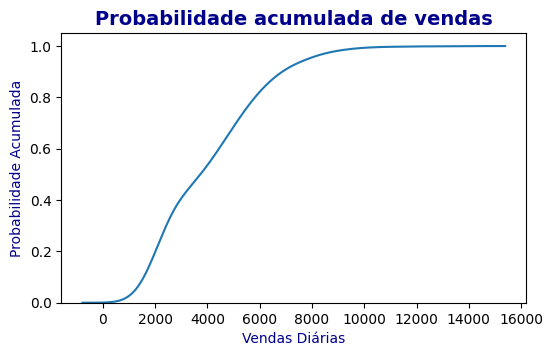

In [98]:
# quero plotar só o kde
fig, ax = plt.subplots(figsize=(6, 3.5))
sns.kdeplot(df.Sales, ax=ax, cumulative=True, fill=False)
ax.set_xlabel("Vendas Diárias", color= 'darkblue')
ax.set_ylabel("Probabilidade Acumulada", color= 'darkblue')
ax.set_title("Probabilidade acumulada de vendas",fontsize=14,weight='bold', color='darkblue')
plt.show()
